In [197]:
import numpy as np
import matplotlib.pyplot as plt

# 課題1-1

シミュレーション時間T 、システムパラメータa, b, c, d、初期値R(0), J (0) を変更してシ
ミュレーションを実行をできるプログラム

In [198]:
# 定数
a = 0
b = 0.5
c = -0.5
d = 0

# 初期値
R0 = 0.5
J0 = 1

# シミュレーションの実行時間
T = 20

# 初期値の配列
initial_conditions = np.array([[0.5, 1], [0.5, 0.5], [-0.5, 1.5], [1.2, -0.3], [0, 0]])
dt = 1e-2
steps = int(T / dt) + 1

# 微分された関数
def dx(x, y):
    return a*x + b*y

def dy(x, y):
    return c*x + d*y


# 解析解をオイラー法で求める関数
def euler(dx, dy, R0, J0, dt, steps):
    """
    連立微分方程式を解く関数

    Prameters:
        dx (function): dR/dtを計算する関数
        dy (function): dJ/dtを計算する関数
        R0, J0 (float): 初期条件
        dt (float): 時間ステップ
        steps (int): 計算ステップ数

    Returns:
        R (list): 時間経過に伴うRの値のリスト
        J (list): 時間経過に伴うJの値のリスト
    """

    R_array = np.zeros(steps)
    J_array = np.zeros(steps)
    R_array[0] = R0
    J_array[0] = J0

    for i in range(1, steps):
        dR_dt = dx(R_array[i-1], J_array[i-1])
        dJ_dt = dy(R_array[i-1], J_array[i-1])
        R_array[i] = R_array[i-1] + dR_dt * dt
        J_array[i] = J_array[i-1] + dJ_dt * dt

    return R_array, J_array


横軸を時間t、縦軸をR(t), J(t)とするグラフ

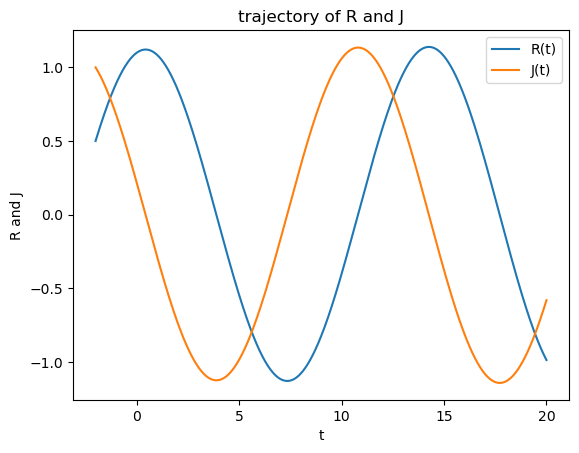

In [199]:
# 解軌道を描画
def plot_trajectory(R0, J0):
    t = np.linspace(-2, T, steps)
    
    R, J = euler(dx, dy, R0, J0, dt, steps)
    plt.plot(t, R, label='R(t)')
    plt.plot(t, J, label='J(t)')
    plt.xlabel('t')
    plt.ylabel("R and J")
    plt.title("trajectory of R and J")
    plt.legend()

plot_trajectory(R0, J0)

横軸をR、縦軸をJとして時間変化に伴う状態ベクトル(R, J)を表示するグラフ

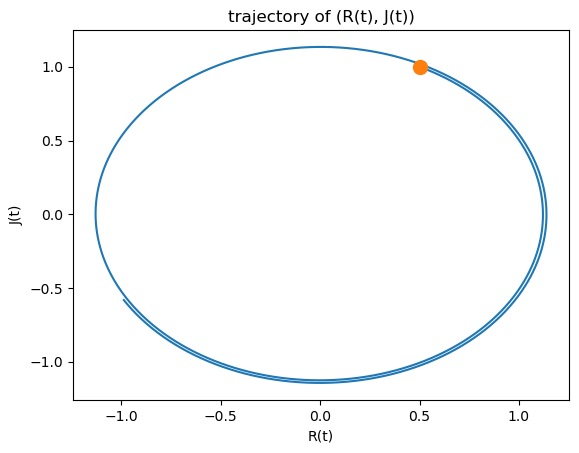

In [200]:
# 解析解のペアをプロット
def plot_trajectory_pair(R0, J0):
    
    # 初期値による解析解を求める
    R, J = euler(dx, dy, R0, J0, dt, steps)

    plt.plot(R, J)
    plt.plot(R0, J0, marker='o', markersize=10) # 初期値のみ強調表示
    plt.xlabel('R(t)')
    plt.ylabel('J(t)')
    plt.title("trajectory of (R(t), J(t))")
    
    plt.show() 

plot_trajectory_pair(R0, J0)

# 課題1-2
1. a = d = 0, b, c > 0
2. a = d = 0, b, c < 0
3. a = d = 0, bc < 0
の場合について課題1-1のコードを実行

In [201]:
# 初期値
R0 = 0.5
J0 = 1
T = 20 # シミュレーションの実行時間
dt = 1e-2
steps = int(T / dt) + 1

1) a = b = 0, b, c > 0の時

In [202]:
a = 0
b = 0.5
c = 0.5
d = 0

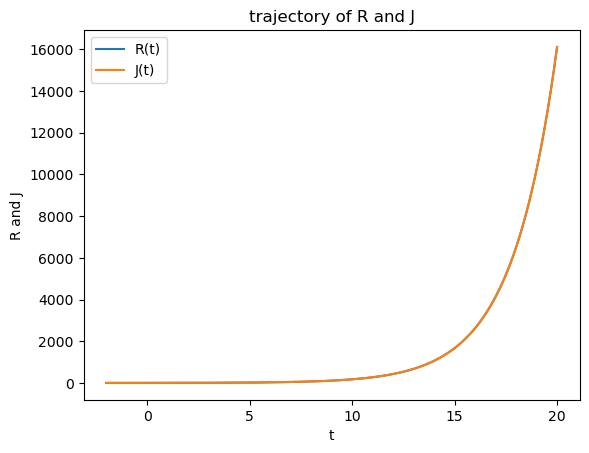

In [203]:
plot_trajectory(R0, J0)

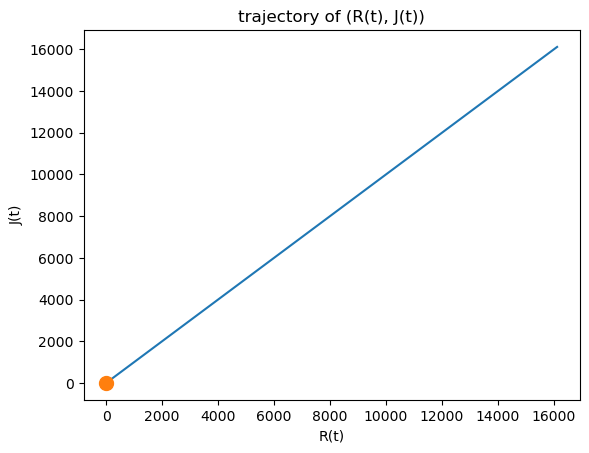

In [204]:
plot_trajectory_pair(R0, J0)

2) a = d = 0, b, c < 0のとき

In [205]:
a = 0
b = -0.5
c = -0.5
d = 0

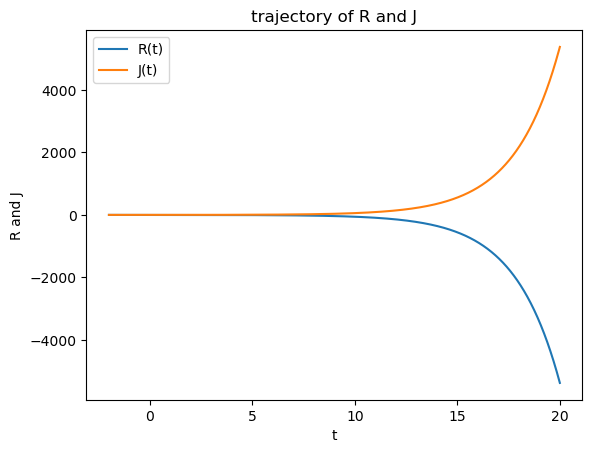

In [206]:
plot_trajectory(R0, J0)

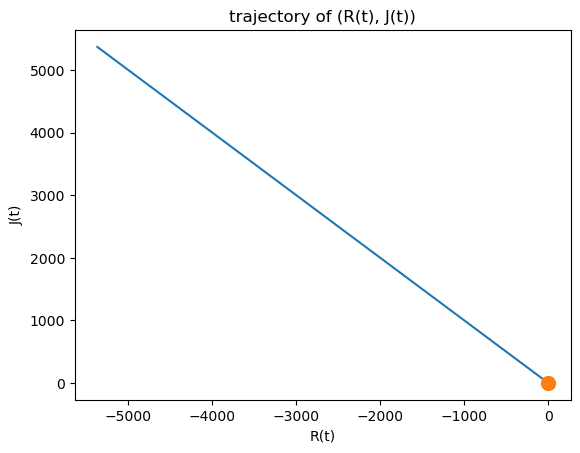

In [207]:
plot_trajectory_pair(R0, J0)

3) a = d = 0, bc < 0の時

In [208]:
a = 0
b = 0.5
c = -0.5
d = 0

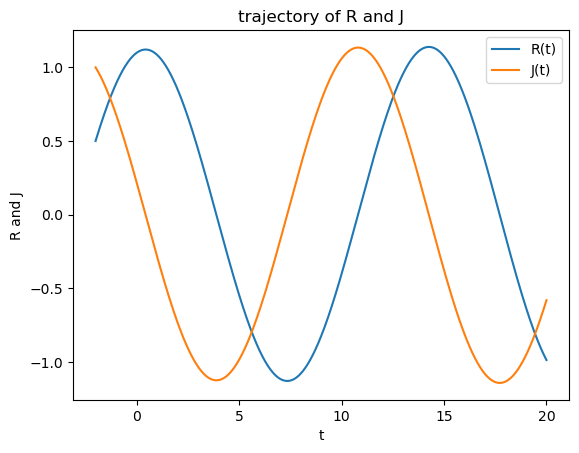

In [209]:
plot_trajectory(R0, J0)

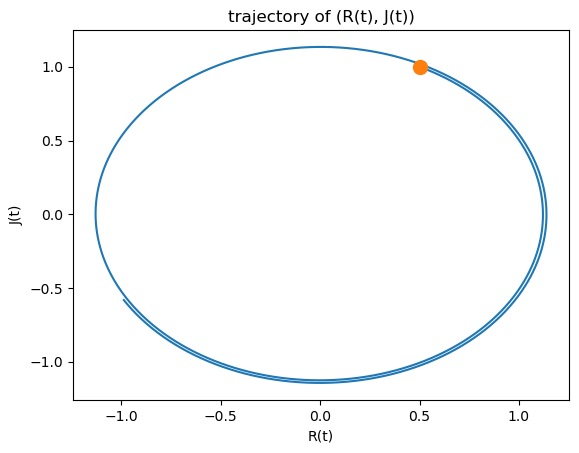

In [210]:
plot_trajectory_pair(R0, J0)

ベクトル場の描画
上記の各場合に対してベクトル場の描画を行う

In [211]:
# ベクトル場を描画
def plot_vector_field(dx: dx, dy:dy):

    # グリッドの作成
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)

    dR = dx(X, Y)
    dJ = dy(X, Y)

    plt.quiver(X, Y, dR, dJ, scale=25)
    plt.xlabel('R')
    plt.ylabel('J')
    plt.title(f"vector field")
    plt.grid()
    plt.show()

1) a = d = 0, b, c > 0の時

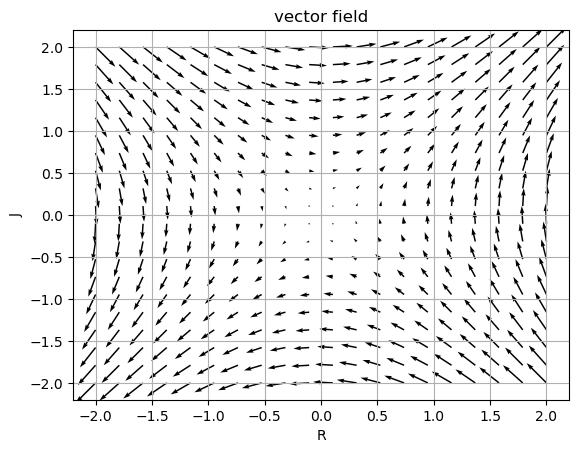

In [212]:
a = 0
b = 0.5
c = 0.5
d = 0
plot_vector_field(dx, dy)

2) a = d = 0, b, c < 0の時

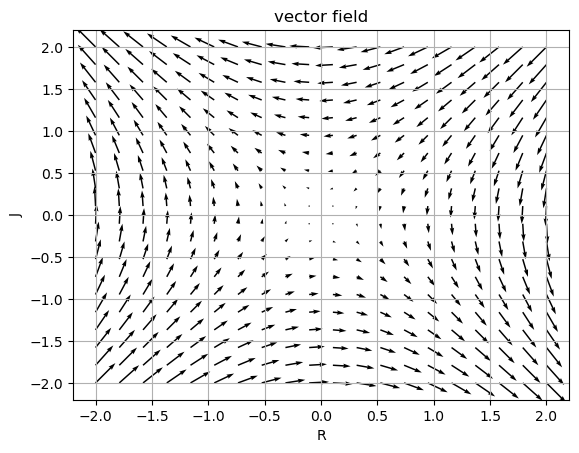

In [213]:
a = 0
b = -0.5
c = -0.5
d = 0

plot_vector_field(dx, dy)

3) a = d = 0, bc < 0の時

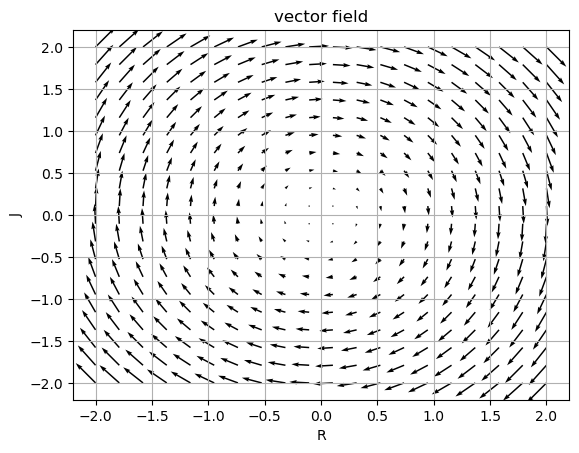

In [214]:
a = 0
b = 0.5
c = -0.5
d = 0

plot_vector_field(dx, dy)